In [183]:
import pandas as panda
from sklearn import linear_model
import matplotlib.pyplot as plt

In [184]:
dataframe = panda.read_csv('NAS.csv')
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
dataframe = dataframe[dataframe['Open'] >= 0]
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [186]:
dataframe.shape

(4218, 7)

In [187]:
dataframe['date_index']= range(4218)

In [188]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date_index
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0,0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0,1
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0,2
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0,3
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0,4


In [189]:
dates = dataframe[['date_index','Date']]

dataframe = dataframe[['date_index','Close']]
input = dataframe.drop('Close',axis='columns')

In [190]:
regObj = linear_model.LinearRegression()
regObj.fit(input,dataframe.Close)

LinearRegression()

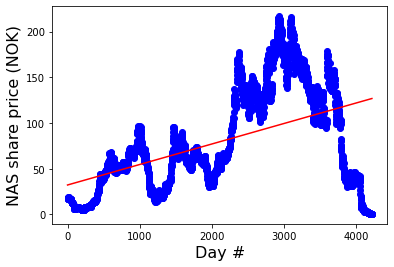

In [213]:
plt.xlabel('Day #',fontsize=16)
plt.ylabel('NAS share price (NOK)',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(dataframe.date_index,dataframe.Close,color='blue')
plt.plot(dataframe.date_index,regObj.predict(dataframe[['date_index']]),color='red') 

In [204]:
dates.tail()

,date_index,Date
4248,4213,2020-10-12
4249,4214,2020-10-13
4250,4215,2020-10-14
4251,4216,2020-10-15
4252,4217,2020-10-16


In [207]:
#Prediction for price N trading days after 16/10/2020 (Last day in set):

def inNdays(N):
    return regObj.predict([[4217+N]])

inNdays(100)

array([129.0733435])

In [214]:
inNdays(1000)

array([149.26077033])

In [216]:
regObj.score(input,dataframe.Close)

0.24524806381968045

^Very low score for this very simple prediction, as expected.